In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#cargan el conunto de datos
df = pd.read_csv("./sonar_dataset.csv", header=None) #carga los datos sin cabecera
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
85,0.0365,0.1632,0.1636,0.1421,0.1130,0.1306,0.2112,0.2268,0.2992,0.3735,...,0.0110,0.0071,0.0205,0.0164,0.0063,0.0078,0.0094,0.0110,0.0068,R
185,0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,...,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058,M
41,0.0093,0.0185,0.0056,0.0064,0.0260,0.0458,0.0470,0.0057,0.0425,0.0640,...,0.0069,0.0064,0.0129,0.0114,0.0054,0.0089,0.0050,0.0058,0.0025,R
96,0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,...,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085,R
135,0.0094,0.0611,0.1136,0.1203,0.0403,0.1227,0.2495,0.4566,0.6587,0.5079,...,0.0234,0.0175,0.0352,0.0158,0.0326,0.0201,0.0168,0.0245,0.0154,M


In [4]:
#revisamos la forma de la estructura, contiene 208 muestras. Se observa que el conjunto de datos no es muy grande 
df.shape

(208, 61)

In [5]:
#cramos los datos de X y Y
X = df.drop(60, axis = 1) #Eliminamos la última columna que contiene el dato de Si es metal o roca
y = df[60]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [6]:
y = pd.get_dummies(y, drop_first=True) #Convierte la variable categórica en variables ficticias/indicadoras.
y.sample(5) # R --> 1 y M --> 0

,R
188,0
67,1
104,0
204,0
6,1


In [7]:
from sklearn.model_selection import train_test_split #Nos permite dividir un dataset en dos bloques, típicamente bloques destinados al entrenamiento y validación del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) #Obtenemos el 25% de los datos de forma aleatoria para las pruebas

In [8]:
import tensorflow as tf
from tensorflow import keras

In [10]:
#agrupa una pila lineal de capas en un archivo tf.keras.Model.
model_1 = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'), #entrada de los 60 parámetros
    keras.layers.Dense(30, activation='relu'), #primer capa oculta
    keras.layers.Dense(15, activation='relu'),#segunda capa oculta
    keras.layers.Dense(1, activation='sigmoid') #salda
])

model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])



In [11]:
model_1_history = model_1.fit(X_train, y_train, epochs=150, batch_size=8,verbose=1,validation_data=(X_test, y_test))
#model_1_history = model_1.fit(X_train, y_train,
 #                             batch_size=batch_size,
 #                             epochs=epochs,
 #                             verbose=1,
 #                             validation_data=(X_test, y_test))

Epoch 1/150
20/20 [==============================] - 1s 15ms/step - loss: 0.6842 - accuracy: 0.5577 - val_loss: 0.6688 - val_accuracy: 0.5000
Epoch 2/150
20/20 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.6154 - val_loss: 0.6431 - val_accuracy: 0.6538
Epoch 3/150
20/20 [==============================] - 0s 4ms/step - loss: 0.6354 - accuracy: 0.6667 - val_loss: 0.6196 - val_accuracy: 0.6923
Epoch 4/150
20/20 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6474 - val_loss: 0.6207 - val_accuracy: 0.6154
Epoch 5/150
20/20 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.7244 - val_loss: 0.5689 - val_accuracy: 0.7115
Epoch 6/150
20/20 [==============================] - 0s 4ms/step - loss: 0.5673 - accuracy: 0.7179 - val_loss: 0.5525 - val_accuracy: 0.7308
Epoch 7/150
20/20 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7756 - val_loss: 0.5219 - val_accuracy: 0.7308
Epoch 8/150


Modelo utilizando dropout

In [12]:
modeld_2 = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [13]:
model_2_history=modeld_2.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, validation_data=(X_test, y_test))

Epoch 1/150
20/20 [==============================] - 2s 25ms/step - loss: 0.7912 - accuracy: 0.5192 - val_loss: 0.7008 - val_accuracy: 0.4231
Epoch 2/150
20/20 [==============================] - 0s 4ms/step - loss: 0.7720 - accuracy: 0.4103 - val_loss: 0.6966 - val_accuracy: 0.4231
Epoch 3/150
20/20 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.4936 - val_loss: 0.6932 - val_accuracy: 0.4423
Epoch 4/150
20/20 [==============================] - 0s 3ms/step - loss: 0.7220 - accuracy: 0.4936 - val_loss: 0.6946 - val_accuracy: 0.5577
Epoch 5/150
20/20 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5385 - val_loss: 0.6949 - val_accuracy: 0.5385
Epoch 6/150
20/20 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5064 - val_loss: 0.6946 - val_accuracy: 0.5385
Epoch 7/150
20/20 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5449 - val_loss: 0.6948 - val_accuracy: 0.5192
Epoch 8/150


In [19]:
import joblib
joblib.dump(model_1, '/content/models/modelo.pkl')

INFO:tensorflow:Assets written to: ram://949412a2-2967-4322-adca-ca6439e1a1a1/assets


['/content/models/modelo.pkl']

# Visualización de la precisión

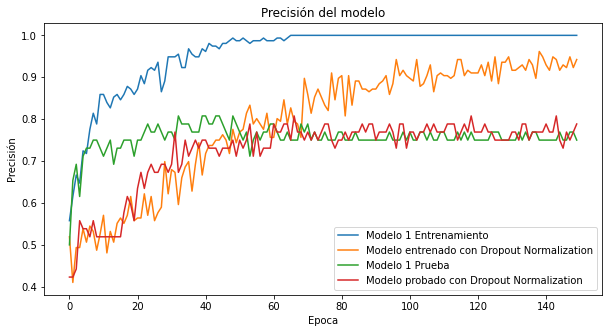

In [14]:
plt.figure(figsize=(10,5))
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoca')
plt.legend(['Modelo 1 Entrenamiento','Modelo entrenado con Dropout Normalization', 
            'Modelo 1 Prueba', 'Modelo probado con Dropout Normalization'],
           loc='lower right')